<h2 style ="color:green" align="center">Group By (Split Apply Combine)</h2>

In [1]:
import pandas as pd
df = pd.read_csv('7.weather_by_city.csv')
df

,day,city,temperature,windspeed,event
0,1/1/2017,Dhaka,32,6,Rain
1,1/2/2017,Dhaka,35,7,Sunny
2,1/3/2017,Dhaka,28,2,Snow
3,1/4/2017,Dhaka,34,6,Rain
4,1/1/2017,Sylhet,22,3,Fog
5,1/2/2017,Sylhet,18,4,Fog
6,1/3/2017,Sylhet,16,9,Cloudy
7,1/4/2017,Sylhet,22,6,Cloudy
8,1/1/2017,Rajshahi,45,12,Sunny
9,1/2/2017,Rajshahi,36,15,Sunny


In [2]:
g = df.groupby('city')
g

In [3]:
for city, city_df in g:
    print(city)
    print(city_df)

Dhaka
        day   city  temperature  windspeed  event
0  1/1/2017  Dhaka           32          6   Rain
1  1/2/2017  Dhaka           35          7  Sunny
2  1/3/2017  Dhaka           28          2   Snow
3  1/4/2017  Dhaka           34          6   Rain
Rajshahi
         day      city  temperature  windspeed   event
8   1/1/2017  Rajshahi           45         12   Sunny
9   1/2/2017  Rajshahi           36         15   Sunny
10  1/3/2017  Rajshahi           50         18    Rain
11  1/4/2017  Rajshahi           44         22  Cloudy
Sylhet
        day    city  temperature  windspeed   event
4  1/1/2017  Sylhet           22          3     Fog
5  1/2/2017  Sylhet           18          4     Fog
6  1/3/2017  Sylhet           16          9  Cloudy
7  1/4/2017  Sylhet           22          6  Cloudy


In [4]:
g_event = df.groupby('event')
g_event

In [5]:
for event, event_df in g_event:
    print(event)
    print(event_df)

Cloudy
         day      city  temperature  windspeed   event
6   1/3/2017    Sylhet           16          9  Cloudy
7   1/4/2017    Sylhet           22          6  Cloudy
11  1/4/2017  Rajshahi           44         22  Cloudy
Fog
        day    city  temperature  windspeed event
4  1/1/2017  Sylhet           22          3   Fog
5  1/2/2017  Sylhet           18          4   Fog
Rain
         day      city  temperature  windspeed event
0   1/1/2017     Dhaka           32          6  Rain
3   1/4/2017     Dhaka           34          6  Rain
10  1/3/2017  Rajshahi           50         18  Rain
Snow
        day   city  temperature  windspeed event
2  1/3/2017  Dhaka           28          2  Snow
Sunny
        day      city  temperature  windspeed  event
1  1/2/2017     Dhaka           35          7  Sunny
8  1/1/2017  Rajshahi           45         12  Sunny
9  1/2/2017  Rajshahi           36         15  Sunny


In [6]:
g.get_group('Rajshahi')

,day,city,temperature,windspeed,event
8,1/1/2017,Rajshahi,45,12,Sunny
9,1/2/2017,Rajshahi,36,15,Sunny
10,1/3/2017,Rajshahi,50,18,Rain
11,1/4/2017,Rajshahi,44,22,Cloudy


In [7]:
g_event.get_group("Rain")

,day,city,temperature,windspeed,event
0,1/1/2017,Dhaka,32,6,Rain
3,1/4/2017,Dhaka,34,6,Rain
10,1/3/2017,Rajshahi,50,18,Rain


In [8]:
g.max()

,day,temperature,windspeed,event
city,,,,
Dhaka,1/4/2017,35,7,Sunny
Rajshahi,1/4/2017,50,22,Sunny
Sylhet,1/4/2017,22,9,Fog


In [9]:
g.max('windspeed')

,temperature,windspeed
city,,
Dhaka,35,7
Rajshahi,50,22
Sylhet,22,9


In [10]:
g.max('temperature')

,temperature,windspeed
city,,
Dhaka,35,7
Rajshahi,50,22
Sylhet,22,9


In [11]:
g.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_19516\2978112660.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()


,temperature,windspeed
city,,
Dhaka,32.25,5.25
Rajshahi,43.75,16.75
Sylhet,19.50,5.50


In [14]:
g.describe()

temperature                                                  \
               count   mean       std   min   25%   50%    75%   max   
city                                                                   
Dhaka            4.0  32.25  3.095696  28.0  31.0  33.0  34.25  35.0   
Rajshahi         4.0  43.75  5.795113  36.0  42.0  44.5  46.25  50.0   
Sylhet           4.0  19.50  3.000000  16.0  17.5  20.0  22.00  22.0   

         windspeed                                                   
             count   mean       std   min    25%   50%    75%   max  
city                                                                 
Dhaka          4.0   5.25  2.217356   2.0   5.00   6.0   6.25   7.0  
Rajshahi       4.0  16.75  4.272002  12.0  14.25  16.5  19.00  22.0  
Sylhet         4.0   5.50  2.645751   3.0   3.75   5.0   6.75   9.0

In [15]:
g.describe().T

city                   Dhaka   Rajshahi     Sylhet
temperature count   4.000000   4.000000   4.000000
            mean   32.250000  43.750000  19.500000
            std     3.095696   5.795113   3.000000
            min    28.000000  36.000000  16.000000
            25%    31.000000  42.000000  17.500000
            50%    33.000000  44.500000  20.000000
            75%    34.250000  46.250000  22.000000
            max    35.000000  50.000000  22.000000
windspeed   count   4.000000   4.000000   4.000000
            mean    5.250000  16.750000   5.500000
            std     2.217356   4.272002   2.645751
            min     2.000000  12.000000   3.000000
            25%     5.000000  14.250000   3.750000
            50%     6.000000  16.500000   5.000000
            75%     6.250000  19.000000   6.750000
            max     7.000000  22.000000   9.000000

In [16]:
g_event.describe()

temperature                                                      \
             count       mean        std   min   25%   50%   75%   max   
event                                                                    
Cloudy         3.0  27.333333  14.742230  16.0  19.0  22.0  33.0  44.0   
Fog            2.0  20.000000   2.828427  18.0  19.0  20.0  21.0  22.0   
Rain           3.0  38.666667   9.865766  32.0  33.0  34.0  42.0  50.0   
Snow           1.0  28.000000        NaN  28.0  28.0  28.0  28.0  28.0   
Sunny          3.0  38.666667   5.507571  35.0  35.5  36.0  40.5  45.0   

       windspeed                                                     
           count       mean       std  min   25%   50%    75%   max  
event                                                                
Cloudy       3.0  12.333333  8.504901  6.0  7.50   9.0  15.50  22.0  
Fog          2.0   3.500000  0.707107  3.0  3.25   3.5   3.75   4.0  
Rain         3.0  10.000000  6.928203  6.0  6.00   6.0  12.00  18.0  
Snow         1.0   2.000000       NaN  2.0  2.00   2.0   2.00   2.0  
Sunny        3.0  11.333333  4.041452  7.0  9.50  12.0  13.50  15.0

In [17]:
g_event.describe().T

event                 Cloudy        Fog       Rain  Snow      Sunny
temperature count   3.000000   2.000000   3.000000   1.0   3.000000
            mean   27.333333  20.000000  38.666667  28.0  38.666667
            std    14.742230   2.828427   9.865766   NaN   5.507571
            min    16.000000  18.000000  32.000000  28.0  35.000000
            25%    19.000000  19.000000  33.000000  28.0  35.500000
            50%    22.000000  20.000000  34.000000  28.0  36.000000
            75%    33.000000  21.000000  42.000000  28.0  40.500000
            max    44.000000  22.000000  50.000000  28.0  45.000000
windspeed   count   3.000000   2.000000   3.000000   1.0   3.000000
            mean   12.333333   3.500000  10.000000   2.0  11.333333
            std     8.504901   0.707107   6.928203   NaN   4.041452
            min     6.000000   3.000000   6.000000   2.0   7.000000
            25%     7.500000   3.250000   6.000000   2.0   9.500000
            50%     9.000000   3.500000   6.000000   2.0  12.000000
            75%    15.500000   3.750000  12.000000   2.0  13.500000
            max    22.000000   4.000000  18.000000   2.0  15.000000

city
Dhaka       Axes(0.125,0.11;0.775x0.77)
Rajshahi    Axes(0.125,0.11;0.775x0.77)
Sylhet      Axes(0.125,0.11;0.775x0.77)
dtype: object

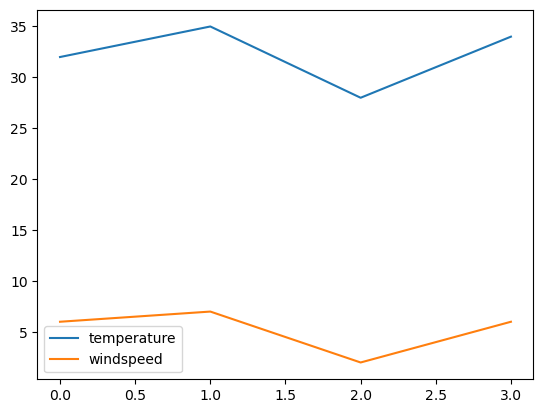

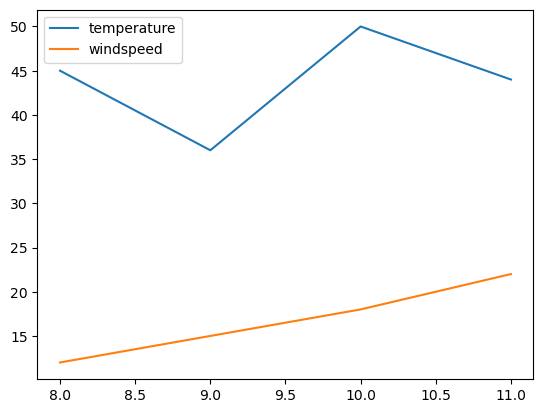

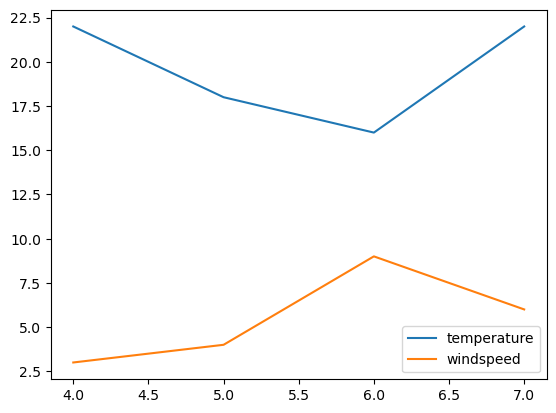

In [13]:
%matplotlib inline
g.plot()

In [ ]:
#link: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups%3E%60_